# Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno

# Reading Data

In [2]:
data_path = '../data/'

In [3]:
part_1 = pd.read_csv(data_path+'data_part_1.csv', index_col=False)
part_2 = pd.read_csv(data_path+'data_part_2.csv', index_col=False)

In [4]:
part_1 = part_1[part_1.columns[1:]]
part_2 = part_2[part_2.columns[1:]]

In [5]:
print(part_1.shape)
part_1.head()

(12180, 1741)


,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,0.035515,0.035214,0.034912,0.034611,0.034310,0.034008,0.033707,0.033405,0.033104,0.032803
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,0.047333,0.047102,0.046871,0.046640,0.046409,0.046178,0.045947,0.045716,0.045485,0.045254
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,0.027101,0.026860,0.026619,0.026379,0.026138,0.025897,0.025656,0.025415,0.025174,0.024933
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,0.038942,0.038526,0.038110,0.037694,0.037278,0.036862,0.036446,0.036030,0.035614,0.035198
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,0.049960,0.049475,0.048989,0.048504,0.048019,0.047534,0.047048,0.046563,0.046078,0.045593


In [6]:
print(part_2.shape)
part_2.head()

(1115, 1758)


,Anthocyanin content (μg/cm²),Anthocyanin concentration (mg/g),Boron content (mg/cm²),Boron concentration (mg/g),C content (mg/cm²),C concentration (mg/g),Ca content (mg/cm²),Ca concentration (mg/g),Carotenoid content (μg/cm²),Carotenoid concentration (mg/g),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,NaN,NaN,NaN,NaN,NaN,NaN,0.275347,42.858184,NaN,NaN,...,0.027329,0.027078,0.026827,0.026576,0.026325,0.026073,0.025822,0.025571,0.025320,0.025069
1,NaN,NaN,NaN,NaN,NaN,NaN,0.072643,24.221242,NaN,NaN,...,0.027595,0.027208,0.026822,0.026435,0.026048,0.025662,0.025275,0.024888,0.024502,0.024115
2,NaN,NaN,NaN,NaN,NaN,NaN,0.181073,17.720565,NaN,NaN,...,0.010216,0.009961,0.009706,0.009450,0.009195,0.008940,0.008685,0.008430,0.008175,0.007919
3,NaN,NaN,NaN,NaN,NaN,NaN,0.040435,8.804204,NaN,NaN,...,0.060050,0.059363,0.058677,0.057991,0.057304,0.056618,0.055931,0.055245,0.054559,0.053872
4,NaN,NaN,NaN,NaN,NaN,NaN,0.012135,4.216834,NaN,NaN,...,0.053631,0.053125,0.052619,0.052113,0.051607,0.051101,0.050596,0.050090,0.049584,0.049078


In [7]:
#First dataset contains much more columns that second (arround 10 times more).

## Datasets have different number of columns (1741 vs 1758), checking which columns differ

In [8]:
set(part_1.columns).symmetric_difference(set(part_2.columns))

{'Anthocyanin concentration (mg/g)',
 'Boron concentration (mg/g)',
 'C concentration (mg/g)',
 'Ca concentration (mg/g)',
 'Carotenoid concentration (mg/g)',
 'Cellulose (mg/g)',
 'Chlorophyll concentration (mg/g)',
 'Copper concentration (mg/g)',
 'Fiber (mg/g)',
 'Lignin (mg/g)',
 'Magnesium concentration (mg/g)',
 'Manganese concentration (mg/g)',
 'N concentration (mg/g)',
 'NSC (mg/g)',
 'P concentration (mg/g)',
 'Potassium concentration (mg/g)',
 'Sulfur concentration (mg/g)'}

In [9]:
# It looks like concentrations are not present in the biggest dataframe.

# Joining datasets

In [11]:
data_df = pd.concat([part_1, part_2])
print(data_df.shape)
data_df.head()

(13295, 1758)


,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,Copper concentration (mg/g),Fiber (mg/g),Lignin (mg/g),Magnesium concentration (mg/g),Manganese concentration (mg/g),N concentration (mg/g),NSC (mg/g),P concentration (mg/g),Potassium concentration (mg/g),Sulfur concentration (mg/g)
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Removing "concentratio" features
data_df = data_df[part_1.columns]

In [18]:
input_cols = data_df.columns[20:]
input_cols

Index(['400', '401', '402', '403', '404', '405', '406', '407', '408', '409',
       ...
       '2441', '2442', '2443', '2444', '2445', '2446', '2447', '2448', '2449',
       '2450'],
      dtype='object', length=1721)

In [19]:
target_cols = data_df.columns[:20]
target_cols

Index(['Anthocyanin content (μg/cm²)', 'Boron content (mg/cm²)',
       'C content (mg/cm²)', 'Ca content (mg/cm²)',
       'Carotenoid content (μg/cm²)', 'Cellulose (mg/cm²)',
       'Chl content (μg/cm²)', 'Copper content (mg/cm²)', 'EWT (mg/cm²)',
       'Fiber (mg/cm²)', 'LAI (m²/m²)', 'LMA (g/m²)', 'Lignin (mg/cm²)',
       'Magnesium content (mg/cm²)', 'Manganese content (mg/cm²)',
       'N content (mg/cm²)', 'NSC (mg/cm²)', 'Phosphorus content (mg/cm²)',
       'Potassium content (mg/cm²)', 'Sulfur content (mg/cm²)'],
      dtype='object')

# Missing value anlalysis

In [20]:
missing_data = data_df.isna().sum() / data_df.shape[0]

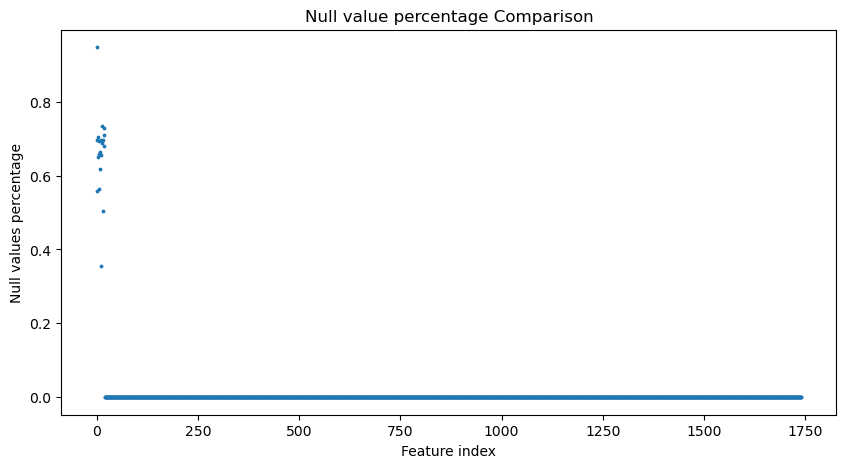

In [21]:
plt.subplots(figsize = (10, 5))
plt.scatter(x = np.arange(data_df.shape[1]), y = missing_data, s = 3)
plt.ylabel("Null values percentage")
plt.xlabel("Feature index")
plt.title("Null value percentage Comparison")
plt.show()

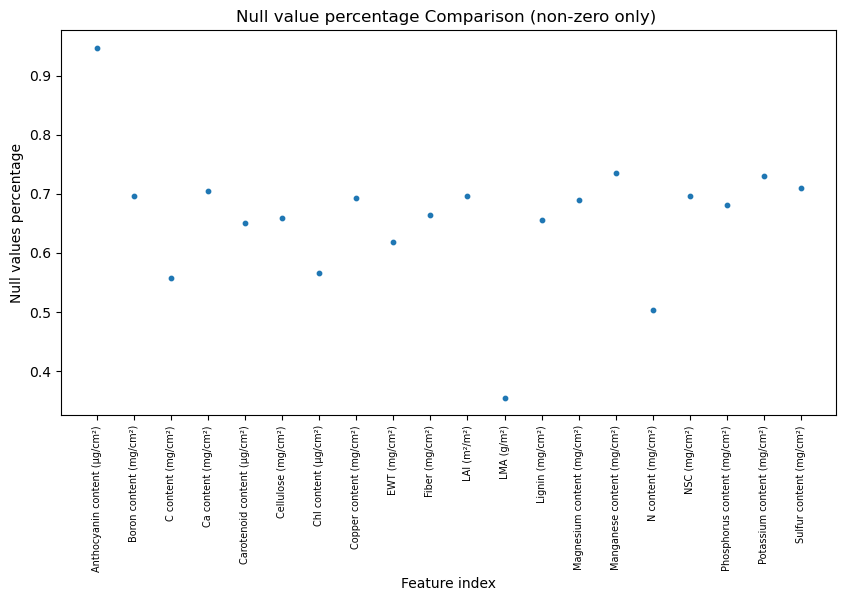

In [22]:
# Focusing only on target features
null_features = missing_data[target_cols]
plt.subplots(figsize = (10, 5))
plt.scatter(x = np.arange(len(null_features)), y = null_features , s = 10)
plt.xticks(np.arange(len(null_features)), null_features.index, rotation=90, fontsize = 7)
plt.ylabel("Null values percentage")
plt.xlabel("Feature index")
plt.title("Null value percentage Comparison (non-zero only) ")
plt.show()

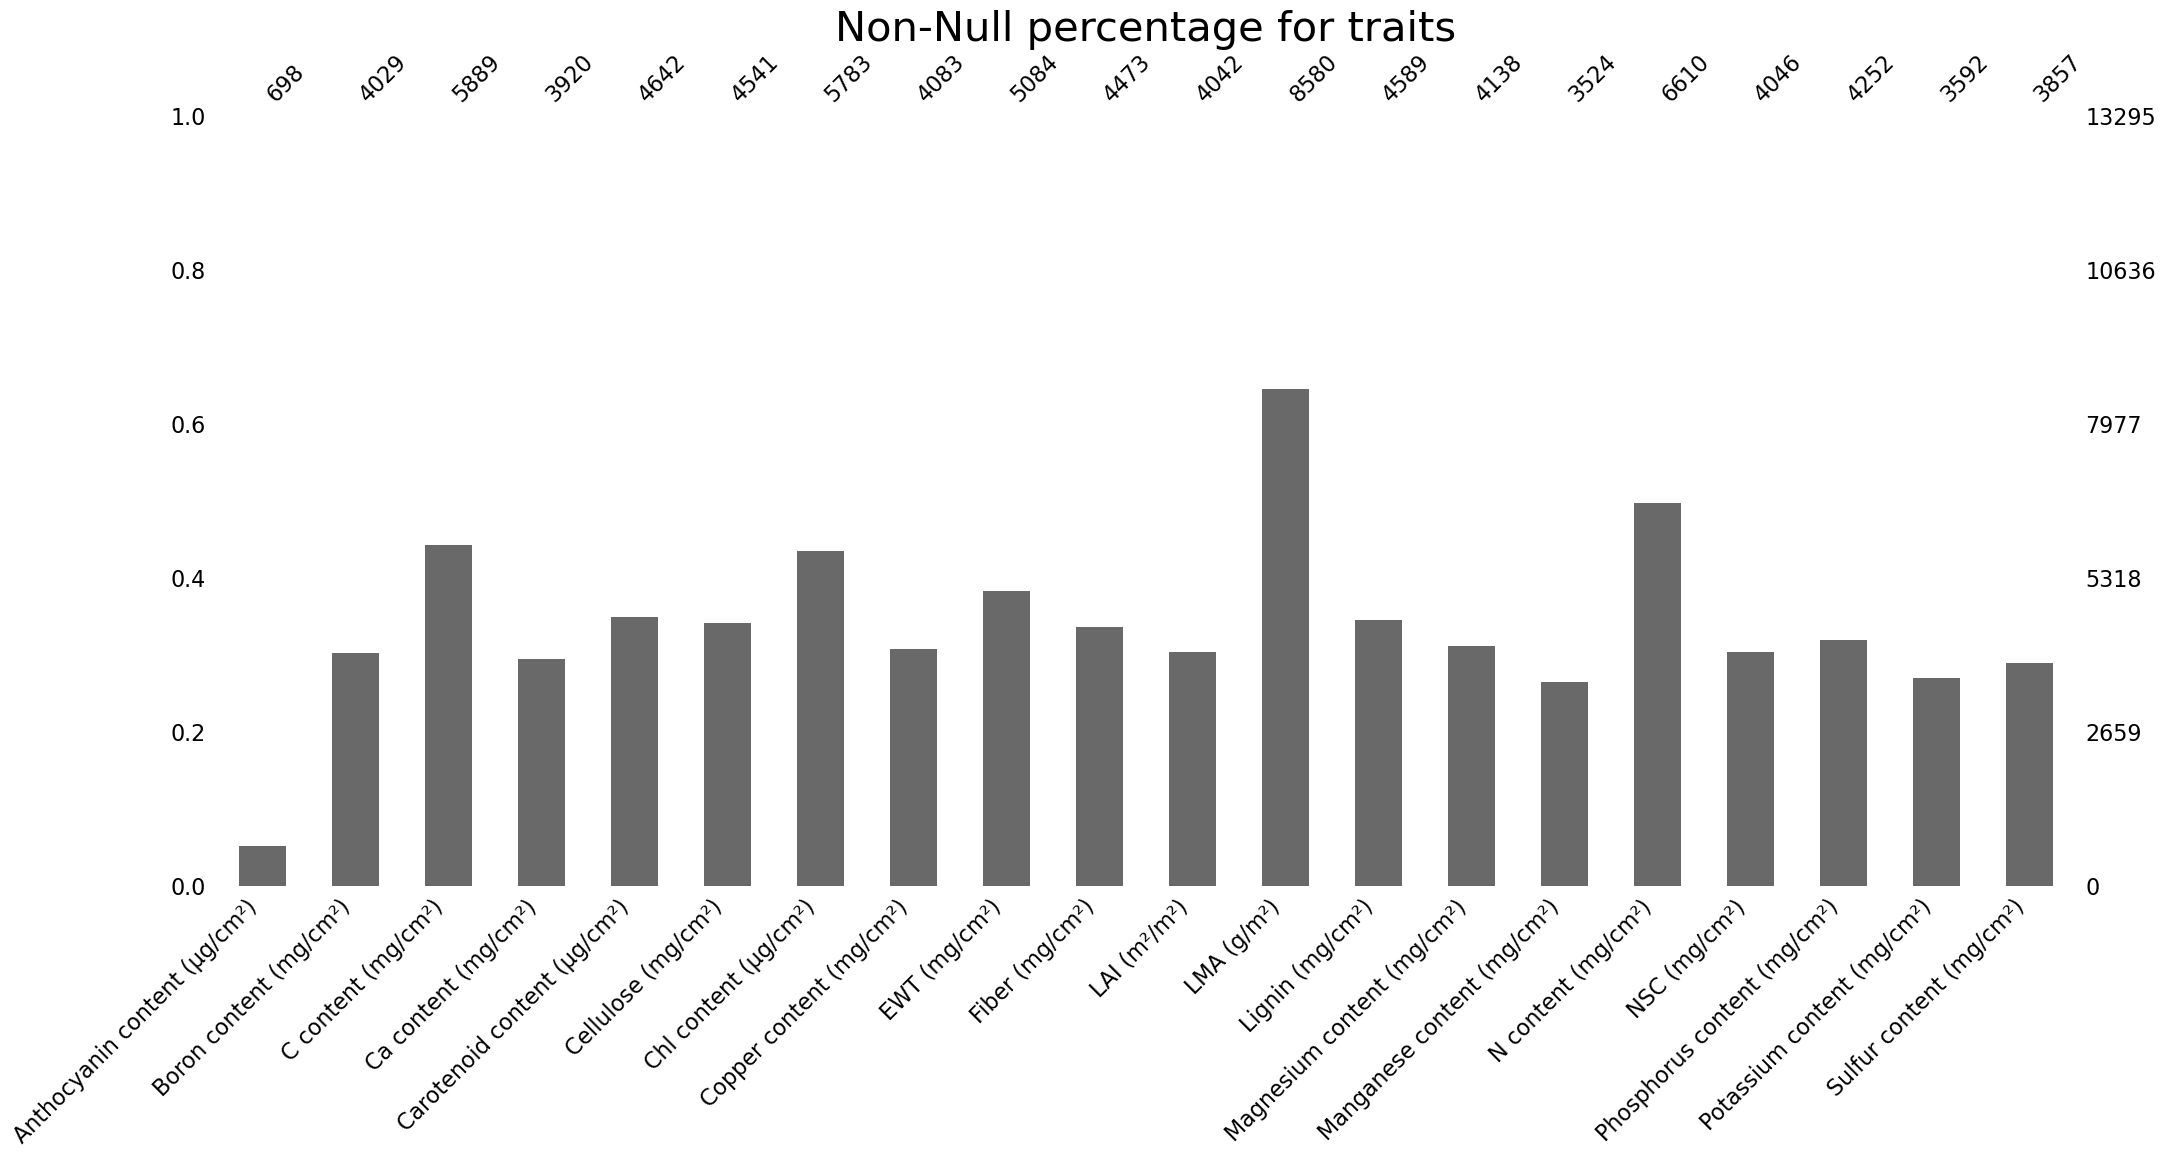

In [23]:
msno.bar( data_df[null_features.index])
plt.title("Non-Null percentage for traits", size=30)
plt.show()

In [24]:
# All traits null value percentage are arround 65%, with some outliers as LMA having ~35% or Anthocyanin content having ~95%.

<Figure size 640x480 with 0 Axes>

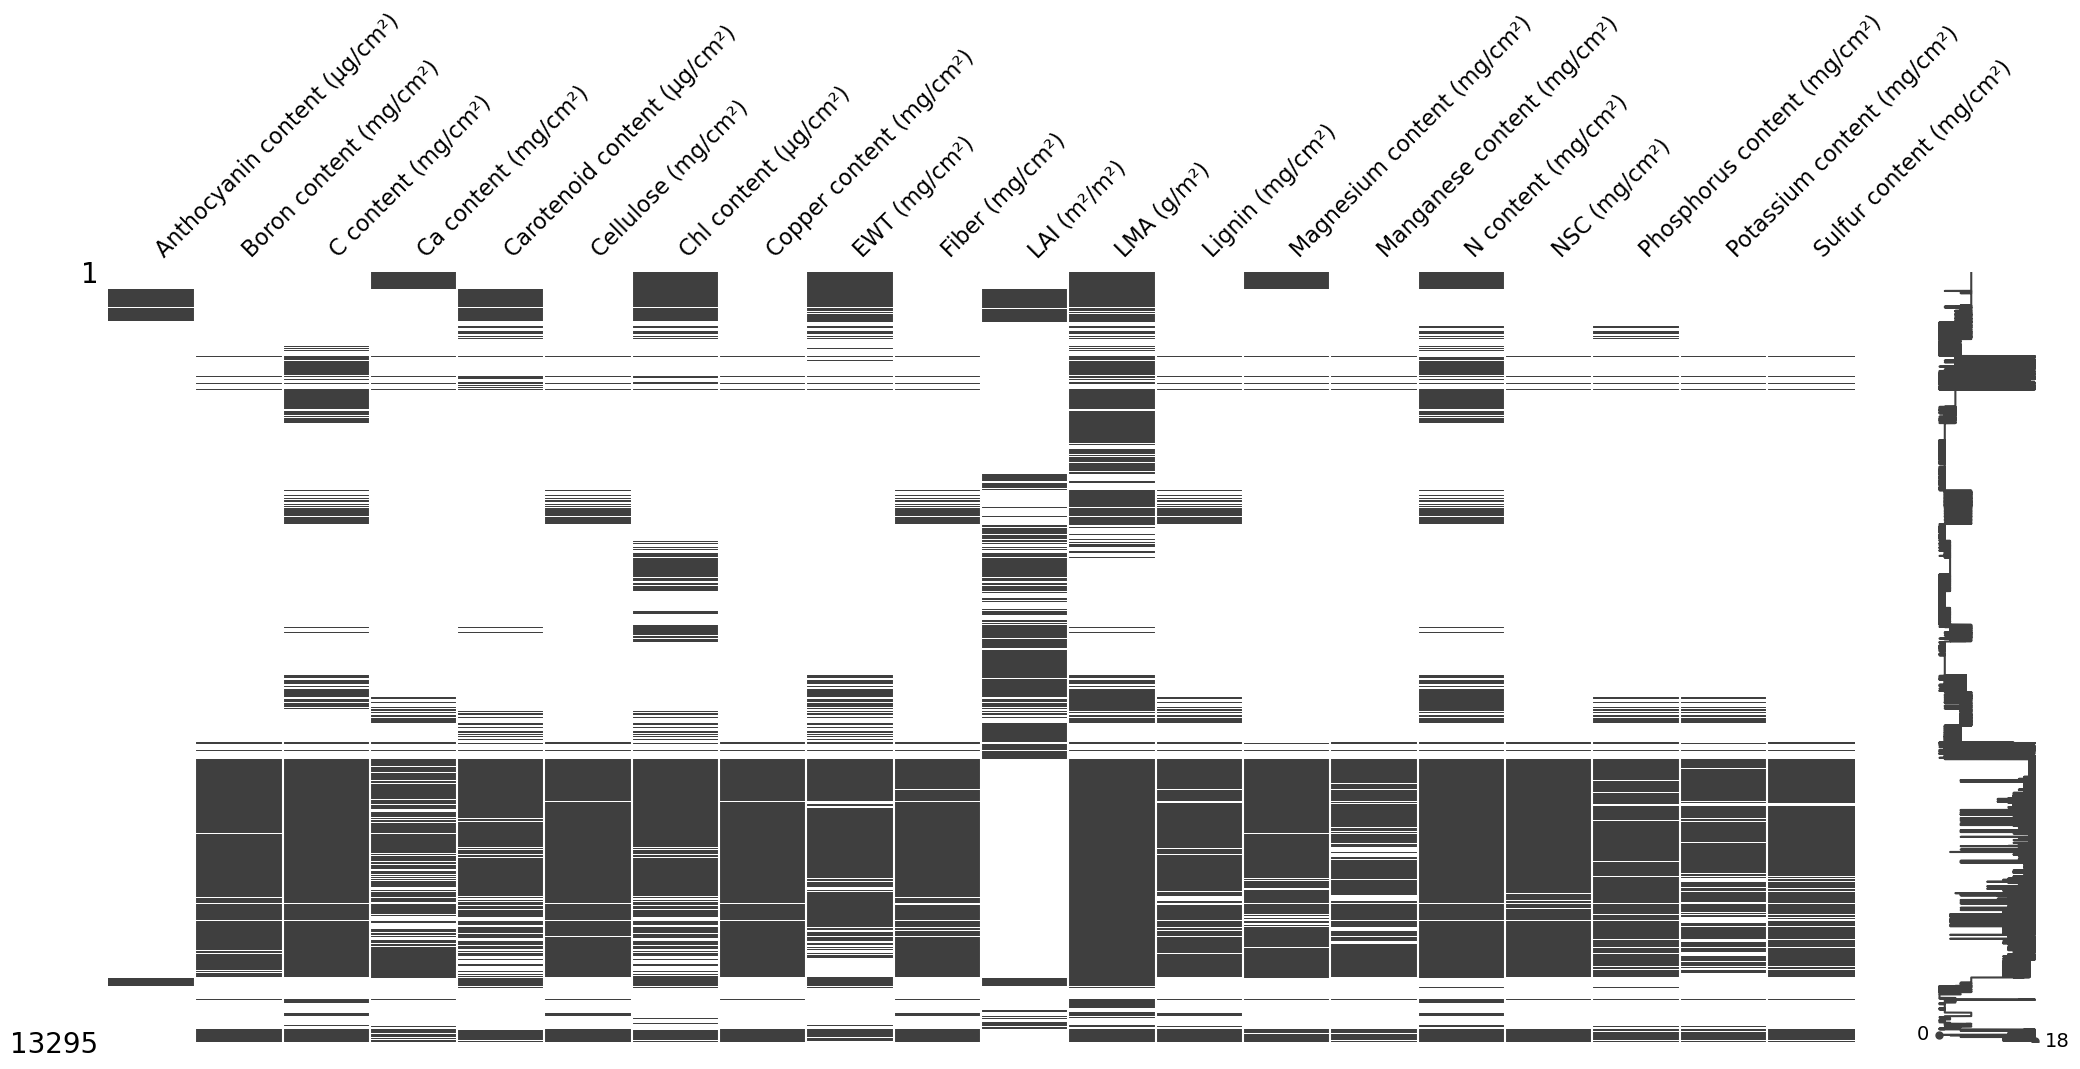

In [25]:
plt.figure()
msno.matrix( data_df[null_features.index] )
plt.show()

# Target visualization

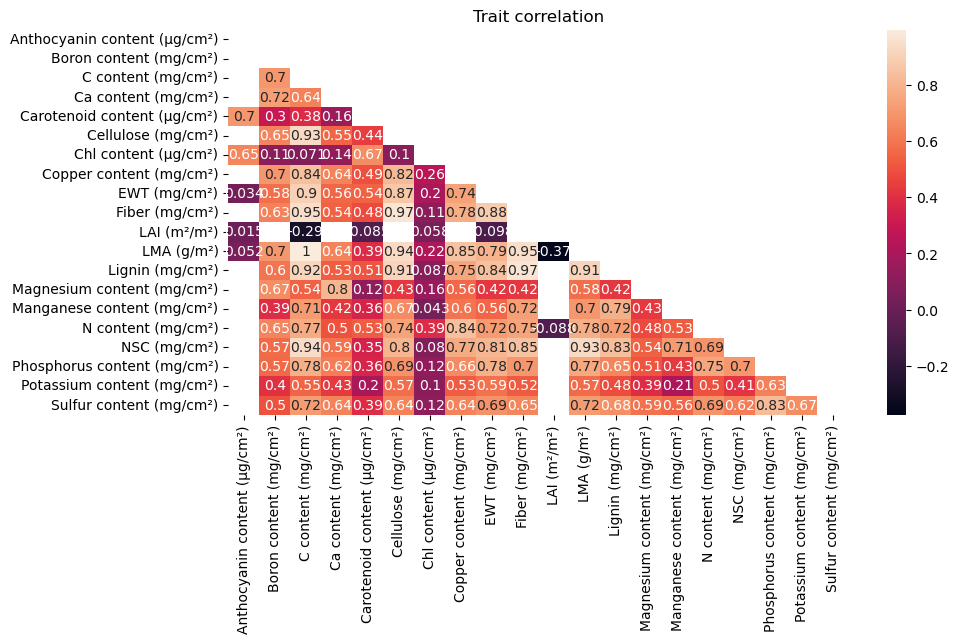

In [26]:
# Plotting correlation
plt.subplots(figsize=(10, 5))
corr = data_df[null_features.index].corr()

sns.heatmap( corr, annot=True, mask = np.triu(corr))
plt.title("Trait correlation")
plt.show()

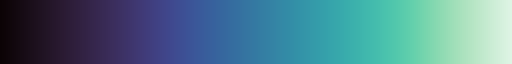

In [58]:
# Target boxplots

In [62]:
input_cols_int = list(map(int, input_cols))
input_data = data_df[input_cols]

colormap = sns.color_palette("mako", as_cmap=True)

import matplotlib.cm as cm 
colormap = cm.viridis

TypeError: 'ListedColormap' object is not subscriptable

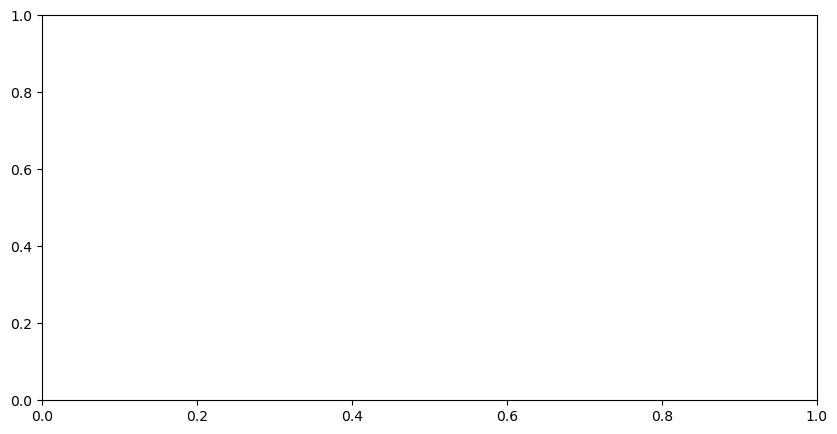

In [63]:
for target in target_cols[:1]:
    input_data = data_df[~data_df[target].isna()] # Keeping only non-na samples
    
    plt.subplots(figsize = (10, 5))
    for _, row in input_data.iterrows():
        plt.plot(input_cols_int, row[input_cols], c = colormap[row[target]] )
        
    plt.show()

In [41]:
row.index

Index(['400', '401', '402', '403', '404', '405', '406', '407', '408', '409',
       ...
       '2441', '2442', '2443', '2444', '2445', '2446', '2447', '2448', '2449',
       '2450'],
      dtype='object', length=1721)

In [47]:
data_df.query('@target_cols[0] != @np.nan ')

TypeError: '>' not supported between instances of 'numpy._ArrayFunctionDispatcher' and 'int'

In [45]:
target_cols[0]

'Anthocyanin content (μg/cm²)'

In [52]:
data_df[~data_df[target_cols[0]].isna()]

,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
290,1.557937,NaN,NaN,NaN,10.911186,NaN,40.967898,NaN,13.293362,NaN,...,0.056543,0.056225,0.055907,0.055589,0.055271,0.054953,0.054635,0.054316,0.053998,0.053680
291,0.928499,NaN,NaN,NaN,7.823762,NaN,27.508626,NaN,11.854785,NaN,...,0.079115,0.078840,0.078566,0.078291,0.078017,0.077742,0.077468,0.077193,0.076918,0.076644
292,0.716710,NaN,NaN,NaN,5.719426,NaN,15.366494,NaN,13.109359,NaN,...,0.347731,0.355149,0.362566,0.369984,0.377401,0.384818,0.392236,0.399653,0.407070,0.414488
293,1.196854,NaN,NaN,NaN,7.862214,NaN,28.859640,NaN,9.271153,NaN,...,0.087344,0.087082,0.086819,0.086556,0.086294,0.086031,0.085768,0.085506,0.085243,0.084981
294,2.434083,NaN,NaN,NaN,11.338027,NaN,43.307934,NaN,13.853277,NaN,...,0.047536,0.047248,0.046960,0.046672,0.046384,0.046096,0.045808,0.045520,0.045232,0.044944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.991086,NaN,NaN,NaN,6.712402,NaN,17.465603,NaN,NaN,NaN,...,0.072779,0.072508,0.072238,0.071967,0.071697,0.071426,0.071155,0.070885,0.070614,0.070344
143,0.628779,NaN,NaN,NaN,7.063951,NaN,15.458280,NaN,NaN,NaN,...,0.062056,0.061710,0.061363,0.061016,0.060669,0.060323,0.059976,0.059629,0.059283,0.058936
144,1.066854,NaN,NaN,NaN,9.112725,NaN,24.408953,NaN,20.943307,NaN,...,0.057927,0.057963,0.057998,0.058034,0.058070,0.058105,0.058141,0.058176,0.058212,0.058247
145,1.467106,NaN,NaN,NaN,10.220248,NaN,38.535635,NaN,NaN,NaN,...,0.028917,0.028822,0.028728,0.028633,0.028539,0.028444,0.028350,0.028255,0.028160,0.028066
